In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import itertools
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2,1,1], voting='soft')
                                   


In [ ]:
X,y = iris_data()
                            

In [ ]:
X = X[:,[1,2]]

In [ ]:
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))
for clf, lab, grd in zip(
    [clf1, clf2, clf3, eclf],
    ['Logistic', 'Random Forest', 'RBF SVM', 'Ensemble'],
    itertools.product([0,1], repeat=2)):
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf,legend=2)
    plt.title(lab)
plt.show()                

# Ward's Agglomerative Hierarchical Clustering

In [56]:
from sklearn.datasets.samples_generator import make_blobs

In [57]:
X, y = make_blobs(n_samples=600, centers=5, cluster_std=0.60, random_state=42)

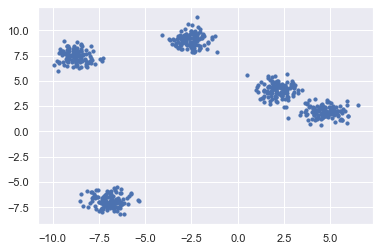

In [4]:
plt.scatter(X[:,0], X[:,1], s=10)

In [5]:
from scipy.cluster.hierarchy import ward,dendrogram, linkage
np.set_printoptions(precision=4, suppress=True)

In [6]:
distance = linkage(X,'ward')

## Dendrogram

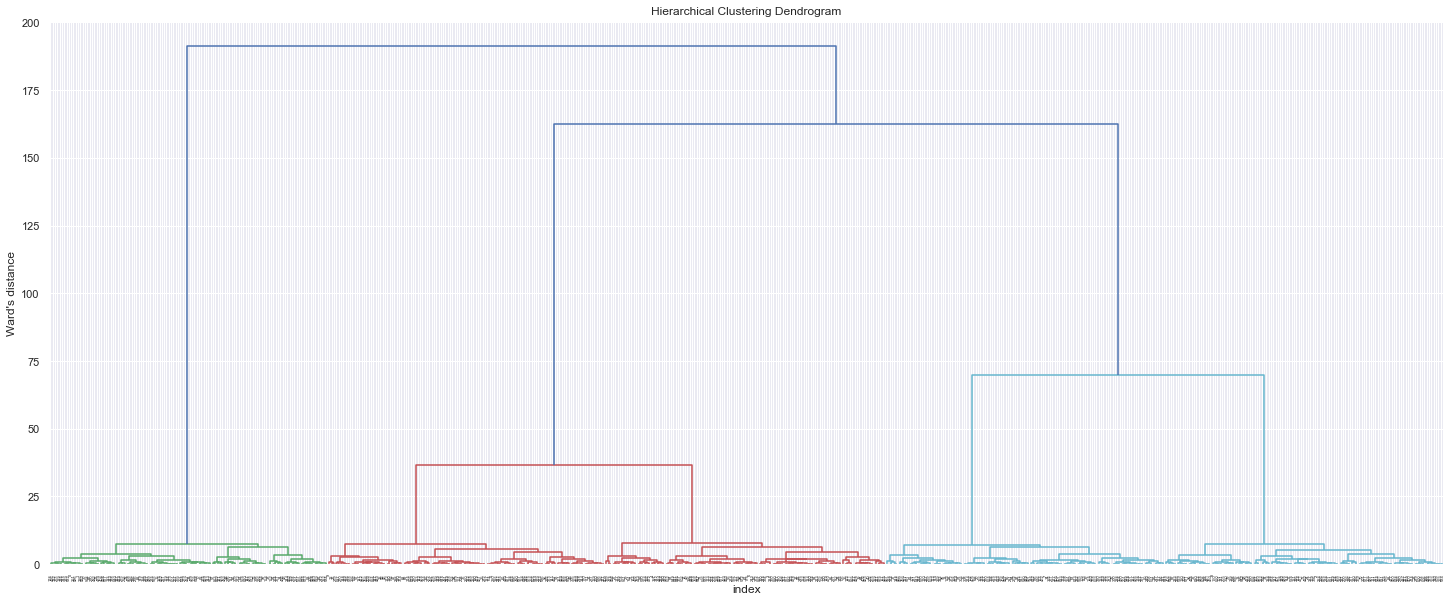

In [7]:
plt.figure(figsize=(25,10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("index")
plt.ylabel("Ward's distance")
dendrogram(distance, leaf_rotation=90,leaf_font_size=4.);

In [ ]:
## Truncating Dendrogram

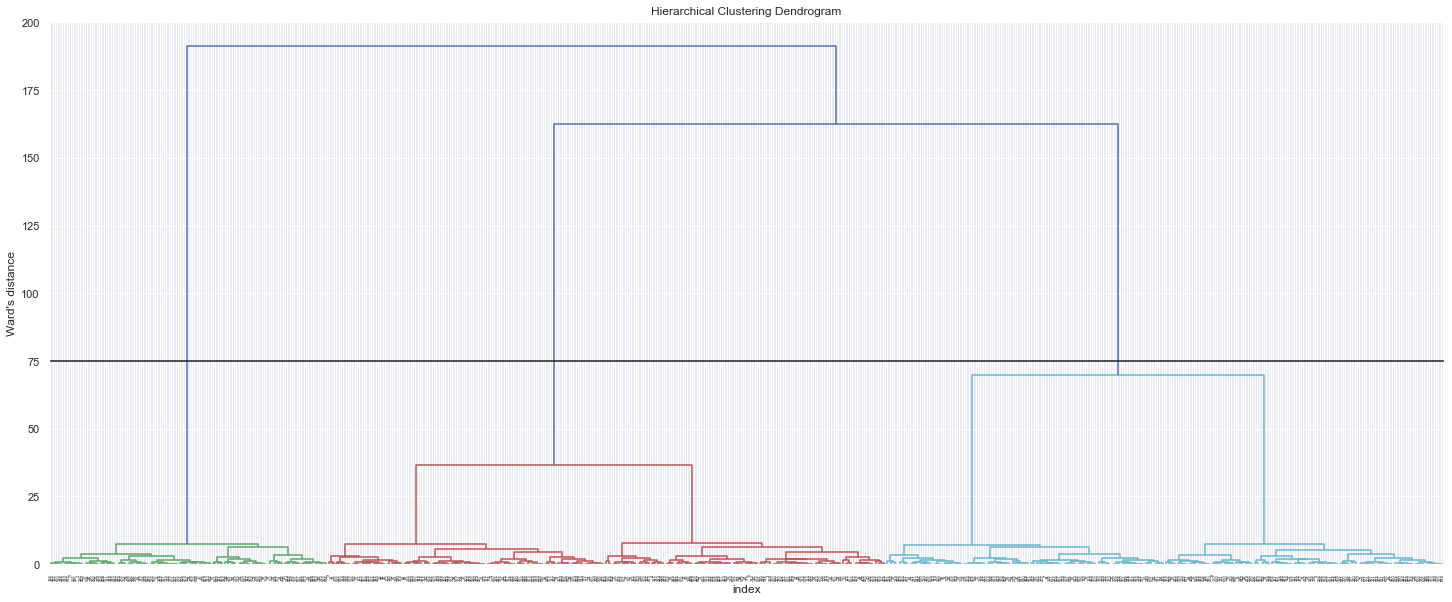

In [8]:
plt.figure(figsize=(25,10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("index")
plt.ylabel("Ward's distance")
dendrogram(distance, leaf_rotation=90,leaf_font_size=4.);
plt.axhline(75,c='k');

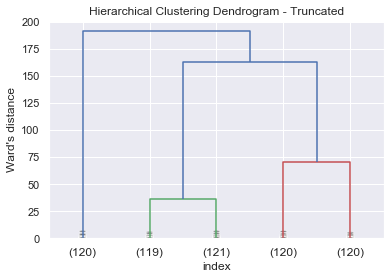

In [11]:
plt.title("Hierarchical Clustering Dendrogram - Truncated")
plt.xlabel("index")
plt.ylabel("Ward's distance")
dendrogram(distance, truncate_mode='lastp', p=5,leaf_rotation=0,leaf_font_size=12.,show_contracted=True);


In [19]:
from scipy.cluster.hierarchy import fcluster
max_d = 25

In [20]:
clusters = fcluster(distance, max_d, criterion='distance')

In [17]:
clusters

array([1, 1, 3, 2, 2, 2, 2, 3, 3, 2, 1, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 2,
       2, 3, 3, 2, 2, 2, 2, 2, 1, 3, 3, 1, 1, 2, 2, 2, 1, 3, 2, 2, 2, 1,
       1, 2, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 1, 1, 2, 2, 3, 1, 3, 2, 2,
       1, 2, 2, 2, 3, 2, 1, 2, 3, 1, 3, 3, 1, 3, 2, 1, 1, 2, 2, 3, 2, 1,
       3, 3, 3, 1, 3, 3, 2, 2, 3, 3, 2, 1, 2, 3, 3, 3, 3, 1, 2, 3, 2, 3,
       3, 3, 3, 2, 3, 2, 3, 3, 1, 1, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 1,
       1, 3, 2, 3, 2, 2, 2, 1, 3, 2, 2, 1, 3, 3, 3, 1, 2, 1, 3, 2, 1, 3,
       1, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2,
       2, 2, 3, 2, 2, 3, 2, 1, 1, 2, 3, 2, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2,
       3, 2, 3, 3, 2, 3, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 3, 3, 2,
       2, 1, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 1, 1, 3, 3, 3, 3, 2,
       1, 2, 1, 2, 2, 3, 2, 2, 2, 1, 3, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 1,
       2, 3, 1, 3, 3, 2, 2, 2, 1, 2, 2, 1, 2, 3, 3, 1, 3, 3, 3, 3, 3, 1,
       3, 2, 2, 2, 1, 1, 2, 1, 1, 3, 1, 2, 3, 3, 3,

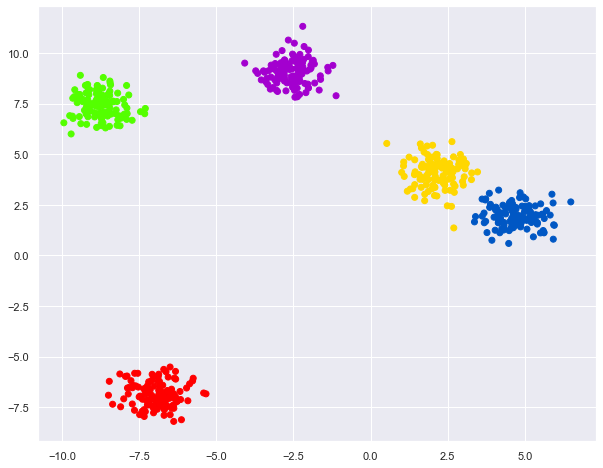

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1], c=clusters, cmap='prism')

# By Clusters

In [23]:
clusters = fcluster(distance, 5, criterion='maxclust')

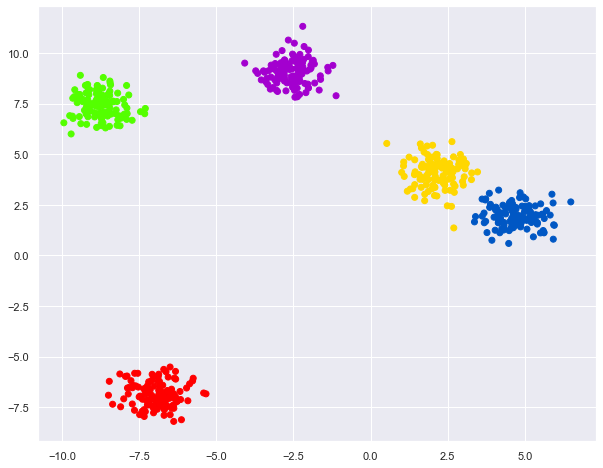

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1], c=clusters, cmap='prism')

## K-means Clustering

In [58]:
from sklearn.cluster import KMeans

In [59]:
kmeans = KMeans(n_clusters=5)

In [60]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
y_kmeans = kmeans.predict(X)

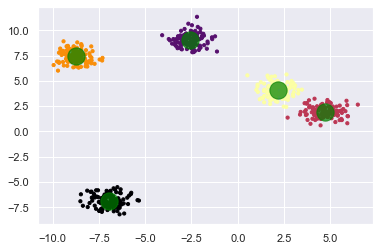

In [37]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=10,cmap='inferno')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=300, alpha=0.7);



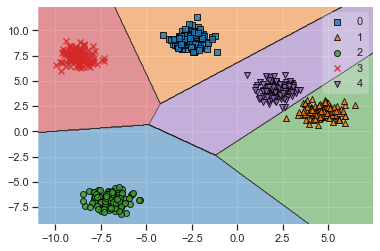

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=kmeans);

# Elbow

In [62]:
sse_ = [] 
for k in range(1,8):
   kmean = KMeans(n_clusters=k).fit(X)
   sse_.append([k, kmean.inertia_])

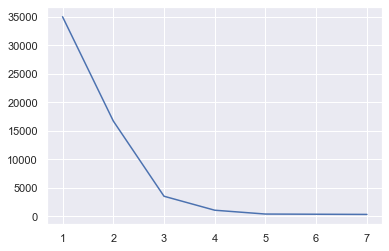

In [63]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Silhoutte

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
sse_ = [] 
for k in range(2,8):
   kmean = KMeans(n_clusters=k).fit(X)
   sse_.append([k, silhouette_score(X, kmean.labels_)])

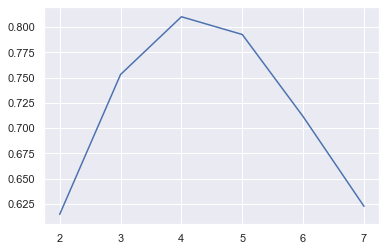

In [67]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Mean Shift

In [83]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

In [84]:
bandwidth_X = estimate_bandwidth(X,quantile=0.1,n_samples=len(X))

In [91]:
estimate_bandwidth?

In [85]:
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=0.9946702350329211, bin_seeding=True, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [86]:
cluster_centers = meanshift_model.cluster_centers_

In [87]:
print('\nCenters of clusters: \n', cluster_centers)


Centers of clusters: 
 [[-2.6733  8.9994]
 [ 4.6837  1.9518]
 [-8.789   7.4687]
 [ 2.2375  4.1844]
 [-6.9235 -7.0323]]


In [88]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('\nNumber of clusters in input data = ', num_clusters)


Number of clusters in input data =  5


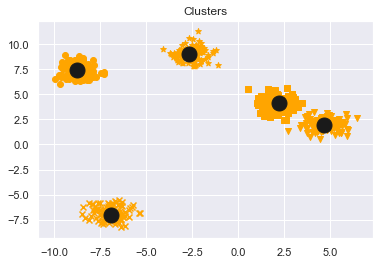

In [89]:
plt.figure()
markers = '*vosx'
for i, marker in zip(range(num_clusters), markers):
    plt.scatter(X[labels==i,0], X[labels==i,1], marker=marker, color='orange')
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',
            markerfacecolor='k', markeredgecolor='k',
            markersize=15)
    plt.title('Clusters')

In [114]:
X[:,1]

array([-7.1396, -7.1108,  6.8881,  3.9046,  2.7071,  2.272 ,  4.6716,
        9.3222,  7.7033,  2.6449, -7.0757,  6.7868,  2.5926,  9.2455,
        9.3398, -6.6716,  8.7122,  3.5375,  8.4522,  4.6916,  8.8349,
        3.4664,  2.1599,  7.3967,  7.0139,  1.5241,  3.0264,  4.1239,
        3.9519,  3.5478, -7.782 , 10.4922,  8.1876, -7.2425, -6.3511,
        4.6177,  1.4768,  1.9375, -6.8446,  9.0808,  4.8651,  2.0426,
        2.0832, -6.0152, -5.8272,  2.3848,  2.1575,  4.2335,  8.1956,
        3.4249,  8.1669,  1.5486, -6.9911,  1.6135,  7.8939,  4.28  ,
        8.7619, -7.3582, -6.4176,  3.2974,  2.3469,  9.9531, -6.5865,
        9.4082,  4.7399,  1.1287, -5.9825,  4.7673,  1.6371,  1.6135,
        7.7284,  3.1176, -7.4674,  4.5498,  7.9321, -6.5541,  8.562 ,
        6.5575, -7.4334,  8.1898,  4.8737, -5.8787, -7.3969,  3.7479,
        3.9391,  8.2668,  3.7585, -7.3985,  7.4344,  8.6215,  8.386 ,
       -6.2042,  9.3226,  9.1925,  1.352 ,  2.7855,  9.1709,  8.4687,
        4.4336, -6.4